<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/notebooks/009_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 K-Means Clustering (Grupowanie)

Wyobraź sobie, że masz sklep. Masz bazę 1000 klientów, ale nic o nich nie wiesz.
Chcesz wysłać do nich reklamy, ale nie chcesz wysyłać reklamy drogiego wina do studentów, ani reklamy taniego piwa do milionerów.

Musisz ich podzielić na grupy (Segmenty). Ale jak?
Tu wchodzi **K-Means**.

To algorytm, który:
1.  Patrzy na dane (np. Zarobki vs Wydatki).
2.  Samodzielnie zauważa, że pewne punkty "lubią się trzymać razem".
3.  Tworzy Klastry (Grupy).

To jest **Uczenie Bez Nadzoru** - komputer sam wymyśla strukturę danych.

--- DANE SUROWE ---


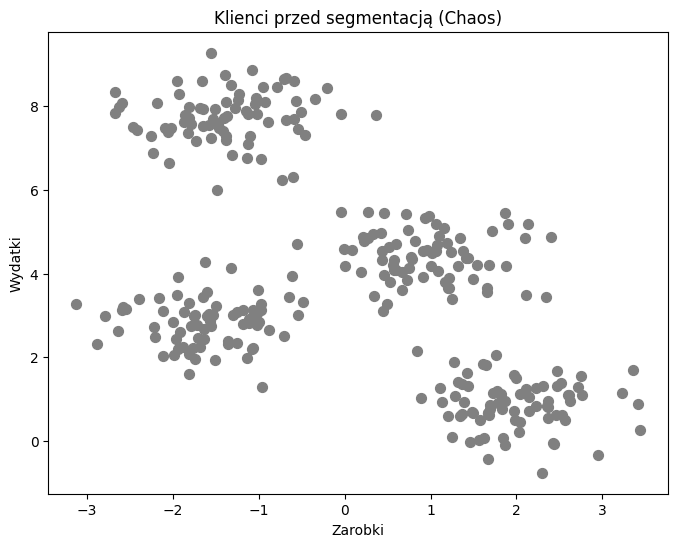

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. GENERUJEMY DANE (Symulacja Klientów)
# Tworzymy 300 klientów, którzy naturalnie dzielą się na 4 grupy, ale my tego "oficjalnie" nie wiemy.
# X to nasze cechy: [Roczne Zarobki, Wynik Wydatków (0-100)]

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Zamieńmy to na DataFrame, żeby wyglądało profesjonalnie
df = pd.DataFrame(X, columns=['Zarobki', 'Wydatki'])

print("--- DANE SUROWE ---")
# Rysujemy wykres - na razie wszystkie kropki są szare (nie wiemy kto jest kim)
plt.figure(figsize=(8, 6))
plt.scatter(df['Zarobki'], df['Wydatki'], s=50, color='grey')
plt.xlabel('Zarobki')
plt.ylabel('Wydatki')
plt.title('Klienci przed segmentacją (Chaos)')
plt.show()

## Algorytm w akcji

Teraz uruchomimy algorytm **K-Means**.
Musimy mu podać tylko jedną rzecz: **K** (czyli: ile grup chcemy znaleźć?).

Powiedzmy, że chcemy znaleźć **4 grupy** klientów (K=4).

Algorytm zrobi tak:
1.  Rzuci losowo 4 punkty (Centroidy) na wykres.
2.  Każdy klient "przytuli się" do najbliższego punktu.
3.  Centroid przesunie się w środek swojej grupy.
4.  Powtórzy to, aż znajdzie idealny środek każdej grupy.

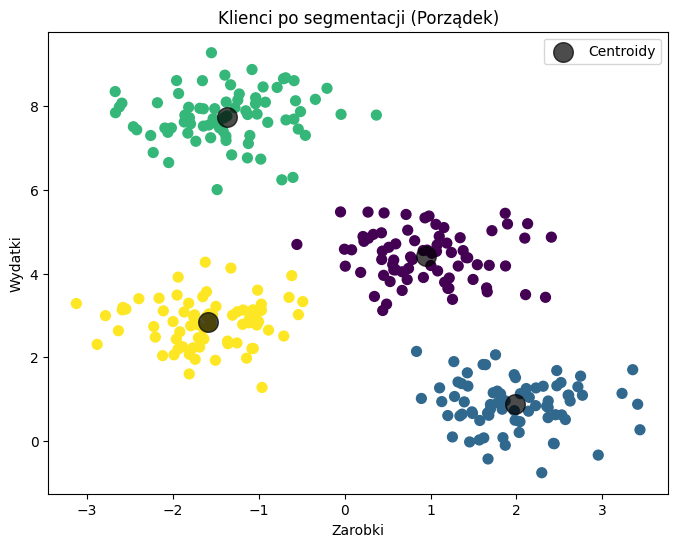

In [2]:
# 1. Tworzymy i trenujemy model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# 2. Przewidujemy, kto należy do jakiej grupy
y_kmeans = kmeans.predict(X)

# 3. WIZUALIZACJA WYNIKU
plt.figure(figsize=(8, 6))

# Rysujemy punkty, ale kolorujemy je według grupy (c=y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Rysujemy CENTROIDY (Te czarne kropki w środku - to są "Szefowie" grup)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7, label='Centroidy')

plt.title('Klienci po segmentacji (Porządek)')
plt.xlabel('Zarobki')
plt.ylabel('Wydatki')
plt.legend()
plt.show()

## Problem: Skąd wziąć "K"? (Metoda Łokcia)

W powyższym przykładzie "oszukiwaliśmy" – wiedzieliśmy, że generujemy 4 grupy.
W prawdziwym życiu nie wiesz, czy klientów należy podzielić na 3, 5 czy 10 segmentów.

Jak to sprawdzić? Używamy **Metody Łokcia (Elbow Method)**.
Liczymy "błąd" (WCSS - suma odległości punktów od środka grupy) dla K=1, K=2, K=3...
Im więcej grup, tym błąd mniejszy (bo punkty są bliżej swoich szefów).

Szukamy momentu, gdzie wykres "łamie się jak łokieć". To jest optymalna liczba grup.

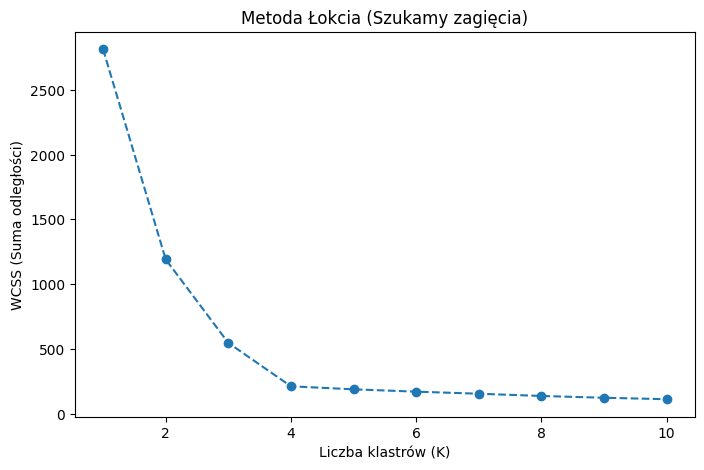

In [3]:
wcss = [] # Tu będziemy zbierać wyniki "błędu"

# Sprawdzamy dla K od 1 do 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ to właśnie nasza miara "zbicia" klastra

# Rysujemy wykres
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metoda Łokcia (Szukamy zagięcia)')
plt.xlabel('Liczba klastrów (K)')
plt.ylabel('WCSS (Suma odległości)')
plt.show()

## 🧠 Podsumowanie: Samotność w tłumie

Co pokazuje wykres "Metoda Łokcia"?
Zauważ, że linia gwałtownie spada, a w okolicy **K=4** zaczyna się wypłaszczać.
To jest ten "łokieć". To znak dla Ciebie: *"Hej, 4 grupy mają sens. Dzielenie na 5, 6, 7 grup niewiele już poprawia, a tylko komplikuje sprawę"*.

**Tu jest haczyk (Unsupervised Learning):**
Algorytm podzielił ludzi na grupy: Żółtą, Zieloną, Fioletową...
Ale **on nie wie, co to znaczy**.
To Ty (Człowiek) musisz spojrzeć na wykres i powiedzieć:
*   "Aha! Grupa Fioletowa ma niskie zarobki i wysokie wydatki -> Nazwijmy ich **Rozrzutni Studenci**".
*   "Grupa Zielona to wysokie zarobki i niskie wydatki -> Nazwijmy ich **Skąpi Milionerzy**".

W Uczeniu Bez Nadzoru AI daje Ci strukturę, ale Ty musisz nadać jej **sens biznesowy**.